In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os
import olsen.constants as consts

EXP_NAME = "bert_slider"

analysis_dir = os.path.join(consts.LABELLED_DATA_DIR,"anthology")
test_dir = os.path.join(consts.OUTPUT_DIR,EXP_NAME)
true = pd.Series()
pred = pd.Series()
for file in os.listdir(analysis_dir):
    file_name, file_ext = os.path.splitext(file)
    if file_ext == ".csv":
        true_add = pd.read_csv(os.path.join(analysis_dir, file))
        pred_add = pd.read_csv(os.path.join(test_dir, file))
        true = pd.concat([true, true_add["Label"]],ignore_index=True)
        pred = pd.concat([pred, pred_add["Label"]],ignore_index=True)


In [12]:
from sklearn.metrics import confusion_matrix
labels = consts.SECT_LABELS
cf_matrix = confusion_matrix(true, pred, labels = labels)

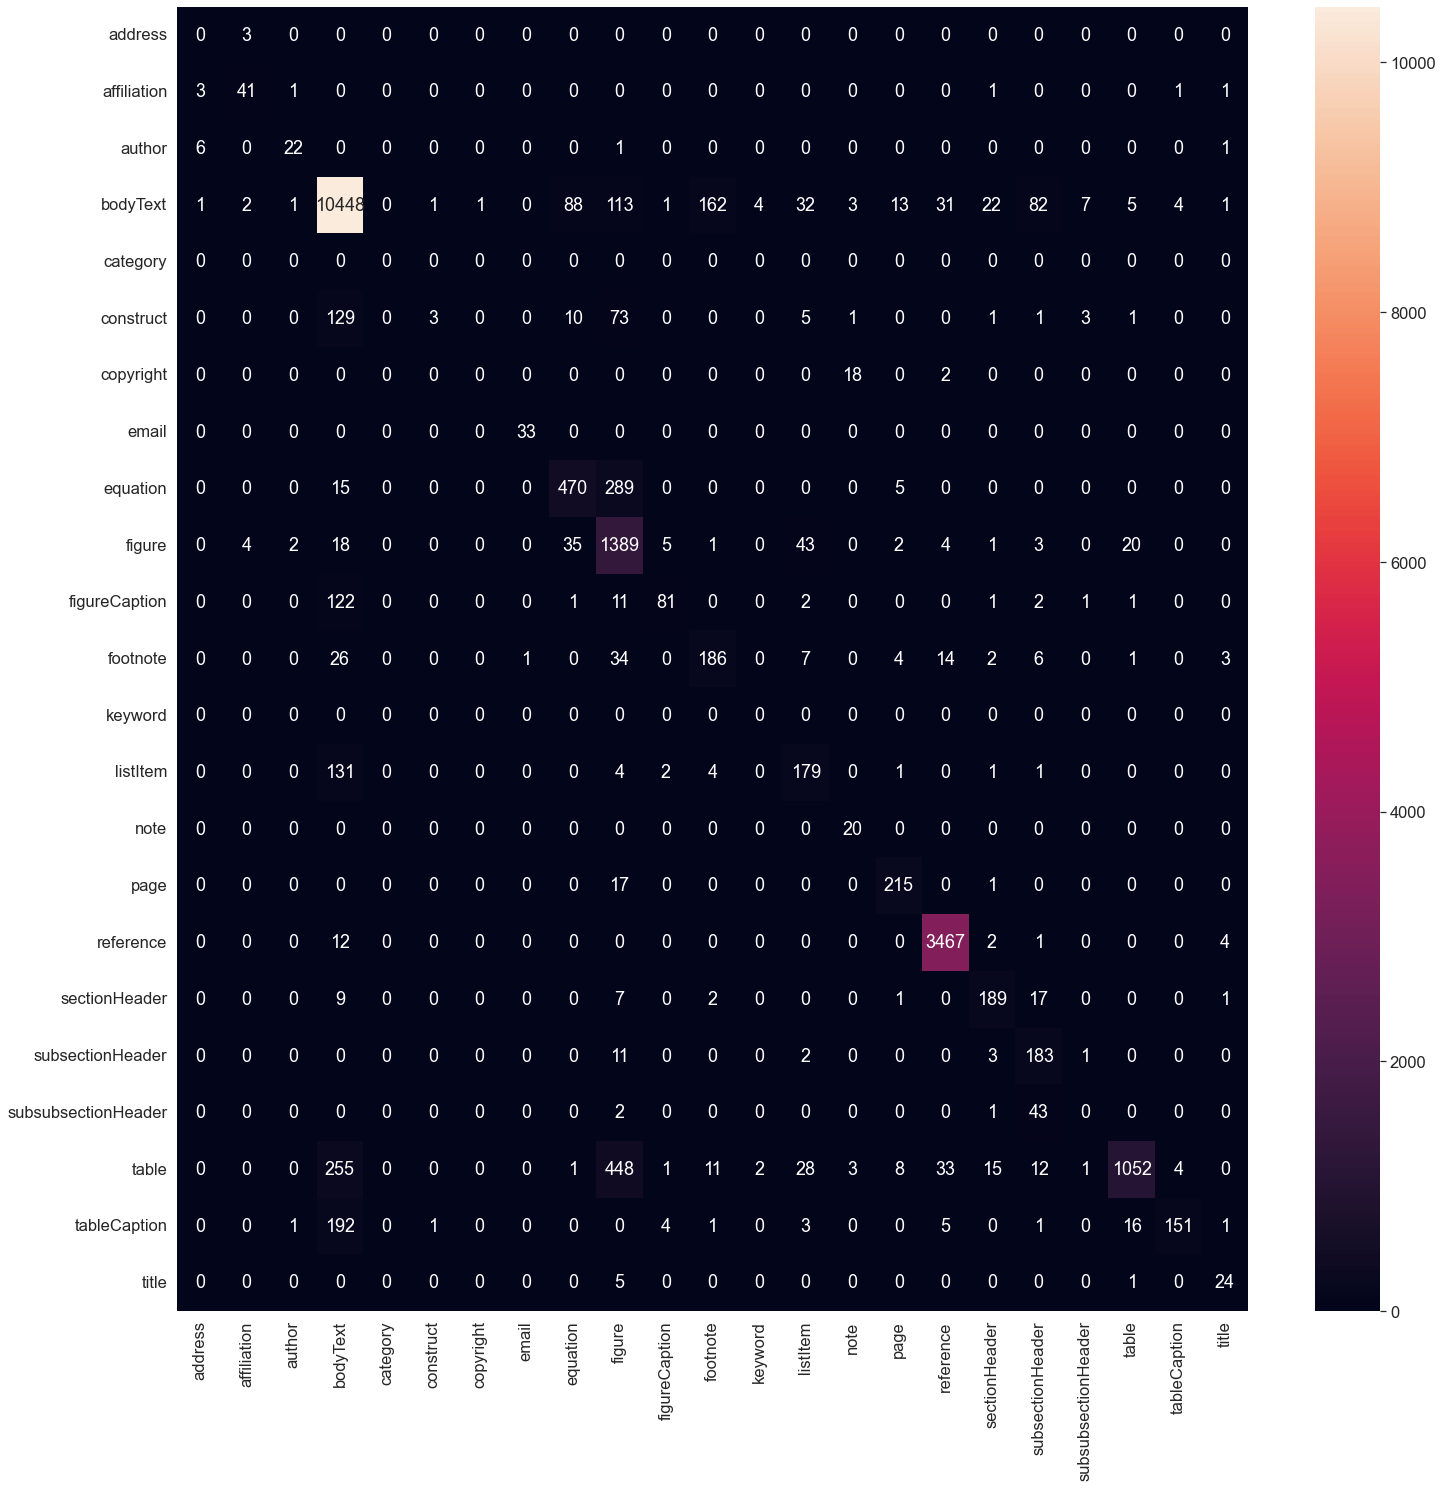

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(font_scale=1.5)
plt.figure(figsize=(24, 24))
cfm_plot = sb.heatmap(cf_matrix, annot=True, xticklabels=labels, yticklabels=labels, fmt='d')
plt.show()

In [14]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
crep = classification_report(true, pred, labels=labels, target_names=labels)
print(crep)


Classification Report

                     precision    recall  f1-score   support

            address       0.00      0.00      0.00         3
        affiliation       0.82      0.85      0.84        48
             author       0.81      0.73      0.77        30
           bodyText       0.92      0.95      0.93     11022
           category       0.00      0.00      0.00         0
          construct       0.60      0.01      0.03       227
          copyright       0.00      0.00      0.00        20
              email       0.97      1.00      0.99        33
           equation       0.78      0.60      0.68       779
             figure       0.58      0.91      0.71      1527
      figureCaption       0.86      0.36      0.51       222
           footnote       0.51      0.65      0.57       284
            keyword       0.00      0.00      0.00         0
           listItem       0.59      0.55      0.57       323
               note       0.44      1.00      0.62        20

In [15]:
cfm_plot.figure.savefig(os.path.join(consts.OUTPUT_DIR,EXP_NAME+"_ext.png"))

import olsen.util.cfreportlatex as clx
print(clx.parse_and_convert_to_latex(crep))

\begin{table}
\centering
\begin{tabular}{r | c c c r}
Class & Precision & Recall & F-score & Support\\
\hline
\hline
address & 0.00 & 0.00 & 0.00 & 3\\
affiliation & 0.82 & 0.85 & 0.84 & 48\\
author & 0.81 & 0.73 & 0.77 & 30\\
bodyText & 0.92 & 0.95 & 0.93 & 11022\\
category & 0.00 & 0.00 & 0.00 & 0\\
construct & 0.60 & 0.01 & 0.03 & 227\\
copyright & 0.00 & 0.00 & 0.00 & 20\\
email & 0.97 & 1.00 & 0.99 & 33\\
equation & 0.78 & 0.60 & 0.68 & 779\\
figure & 0.58 & 0.91 & 0.71 & 1527\\
figureCaption & 0.86 & 0.36 & 0.51 & 222\\
footnote & 0.51 & 0.65 & 0.57 & 284\\
keyword & 0.00 & 0.00 & 0.00 & 0\\
listItem & 0.59 & 0.55 & 0.57 & 323\\
note & 0.44 & 1.00 & 0.62 & 20\\
page & 0.86 & 0.92 & 0.89 & 233\\
reference & 0.97 & 0.99 & 0.98 & 3486\\
sectionHeader & 0.79 & 0.84 & 0.81 & 226\\
subsectionHeader & 0.52 & 0.92 & 0.66 & 200\\
subsubsectionHeader & 0.00 & 0.00 & 0.00 & 46\\
table & 0.96 & 0.56 & 0.71 & 1874\\
tableCaption & 0.94 & 0.40 & 0.56 & 376\\
title & 0.67 & 0.80 & 0.73 & 30\\
m